In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_validate


from sklearn.metrics import mean_squared_error 
from collections import defaultdict
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

#import Libraries

In [2]:

df = pd.read_csv("Dentistry Dataset.csv",index_col=0)
#load dataset
df.head ()


Sample ID  Age  Gender  inter canine distance intraoral  \
Sl No                                                            
1            NaN   24  Female                            25.06   
2            NaN   22  Female                            25.78   
3            NaN   23  Female                            23.83   
4            NaN   20  Female                            26.12   
5            NaN   20  Female                            26.36   

       intercanine distance casts  right canine width intraoral  \
Sl No                                                             
1                           25.05                          6.08   
2                           25.79                          6.13   
3                           23.83                          5.91   
4                           26.12                          6.08   
5                           26.41                          6.09   

       right canine width casts  left canine width intraoral  \
Sl No                                                          
1                          6.08                         6.09   
2                          6.13                         6.33   
3                          5.96                         6.28   
4                          6.08                         6.56   
5                          6.09                         6.50   

       left canine width casts  right canine index intra oral  \
Sl No                                                           
1                         6.10                          0.242   
2                         6.33                          0.237   
3                         6.28                          0.248   
4                         6.56                          0.232   
5                         6.50                          0.231   

       right canine index casts  left canine index intraoral  \
Sl No                                                          
1                         0.242                        0.242   
2                         0.237                        0.247   
3                         0.248                        0.264   
4                         0.232                        0.250   
5                         0.231                        0.246   

       left canine index casts  
Sl No                           
1                        0.241  
2                        0.247  
3                        0.264  
4                        0.250  
5                        0.246

In [3]:
df.shape

(1100, 13)

In [4]:
df.isnull()

Sample ID    Age  Gender  inter canine distance intraoral  \
Sl No                                                              
1           True  False   False                            False   
2           True  False   False                            False   
3           True  False   False                            False   
4           True  False   False                            False   
5           True  False   False                            False   
...          ...    ...     ...                              ...   
1096        True  False   False                            False   
1097        True  False   False                            False   
1098        True  False   False                            False   
1099        True  False   False                            False   
1100        True  False   False                            False   

       intercanine distance casts  right canine width intraoral  \
Sl No                                                             
1                           False                         False   
2                           False                         False   
3                           False                         False   
4                           False                         False   
5                           False                         False   
...                           ...                           ...   
1096                        False                         False   
1097                        False                         False   
1098                        False                         False   
1099                        False                         False   
1100                        False                         False   

       right canine width casts  left canine width intraoral  \
Sl No                                                          
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
5                         False                        False   
...                         ...                          ...   
1096                      False                        False   
1097                      False                        False   
1098                      False                        False   
1099                      False                        False   
1100                      False                        False   

       left canine width casts  right canine index intra oral  \
Sl No                                                           
1                        False                          False   
2                        False                          False   
3                        False                          False   
4                        False                          False   
5                        False                          False   
...                        ...                            ...   
1096                     False                          False   
1097                     False                          False   
1098                     False                          False   
1099                     False                          False   
1100                     False                          False   

       right canine index casts  left canine index intraoral  \
Sl No                                                          
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
5                         False                        False   
...                         ...                          ...   
1096                      False                        Fals

In [5]:
df.isnull().sum()

Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of        Sample ID  Age  Gender  inter canine distance intraoral  \
Sl No                                                            
1            NaN   24  Female                            25.06   
2            NaN   22  Female                            25.78   
3            NaN   23  Female                            23.83   
4            NaN   20  Female                            26.12   
5            NaN   20  Female                            26.36   
...          ...  ...     ...                              ...   
1096         NaN   24    Male                            24.29   
1097         NaN   22    Male                            25.22   
1098         NaN   25    Male                            24.24   
1099         NaN   21    Male                            24.87   
1100         NaN   23    Male                            24.51   

       intercanine distance casts  right canine width intraoral  \
Sl No                                     

In [7]:
df.dropna (axis=1,inplace=True)
#Removed Unwanted Data "Sample ID"

In [8]:
df.dtypes

Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le =LabelEncoder()
# label_encoder object

In [10]:
df.describe

<bound method NDFrame.describe of        Age  Gender  inter canine distance intraoral  \
Sl No                                                 
1       24  Female                            25.06   
2       22  Female                            25.78   
3       23  Female                            23.83   
4       20  Female                            26.12   
5       20  Female                            26.36   
...    ...     ...                              ...   
1096    24    Male                            24.29   
1097    22    Male                            25.22   
1098    25    Male                            24.24   
1099    21    Male                            24.87   
1100    23    Male                            24.51   

       intercanine distance casts  right canine width intraoral  \
Sl No                                                             
1                           25.05                          6.08   
2                           25.79                

In [11]:
df.nunique()
#check for unique values or cardinality

Age                                  8
Gender                               2
inter canine distance intraoral    456
intercanine distance casts         462
right canine width intraoral       173
right canine width casts           173
left canine width intraoral        172
left canine width casts            172
right canine index intra oral       80
right canine index casts            72
left canine index intraoral         72
left canine index casts             72
dtype: int64

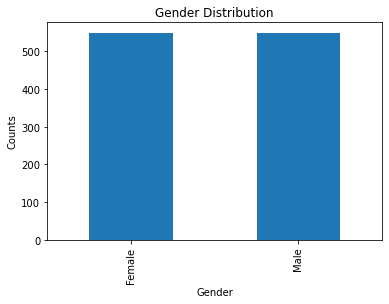

In [12]:
#target distribution

df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.ylabel('Counts')
plt.xlabel('Gender')
plt.show()

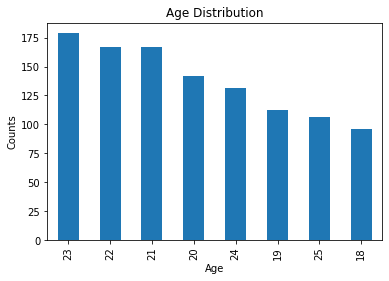

In [13]:

df['Age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.show()

In [14]:
df.columns

Index(['Age', 'Gender', 'inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'right canine width casts', 'left canine width intraoral',
       'left canine width casts', 'right canine index intra oral',
       'right canine index casts', 'left canine index intraoral',
       'left canine index casts'],
      dtype='object')

In [15]:
df.head()

Age  Gender  inter canine distance intraoral  \
Sl No                                                 
1       24  Female                            25.06   
2       22  Female                            25.78   
3       23  Female                            23.83   
4       20  Female                            26.12   
5       20  Female                            26.36   

       intercanine distance casts  right canine width intraoral  \
Sl No                                                             
1                           25.05                          6.08   
2                           25.79                          6.13   
3                           23.83                          5.91   
4                           26.12                          6.08   
5                           26.41                          6.09   

       right canine width casts  left canine width intraoral  \
Sl No                                                          
1                          6.08                         6.09   
2                          6.13                         6.33   
3                          5.96                         6.28   
4                          6.08                         6.56   
5                          6.09                         6.50   

       left canine width casts  right canine index intra oral  \
Sl No                                                           
1                         6.10                          0.242   
2                         6.33                          0.237   
3                         6.28                          0.248   
4                         6.56                          0.232   
5                         6.50                          0.231   

       right canine index casts  left canine index intraoral  \
Sl No                                                          
1                         0.242                        0.242   
2                         0.237                        0.247   
3                         0.248                        0.264   
4                         0.232                        0.250   
5                         0.231                        0.246   

       left canine index casts  
Sl No                           
1                        0.241  
2                        0.247  
3                        0.264  
4                        0.250  
5                        0.246

In [17]:
le =LabelEncoder()
# label_encoder object

In [18]:
df['Gender_label']= le.fit_transform(df['Gender'])
# Encode labels in column. #Label Gender 0,1

In [19]:
df.dtypes

Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
Gender_label                         int32
dtype: object

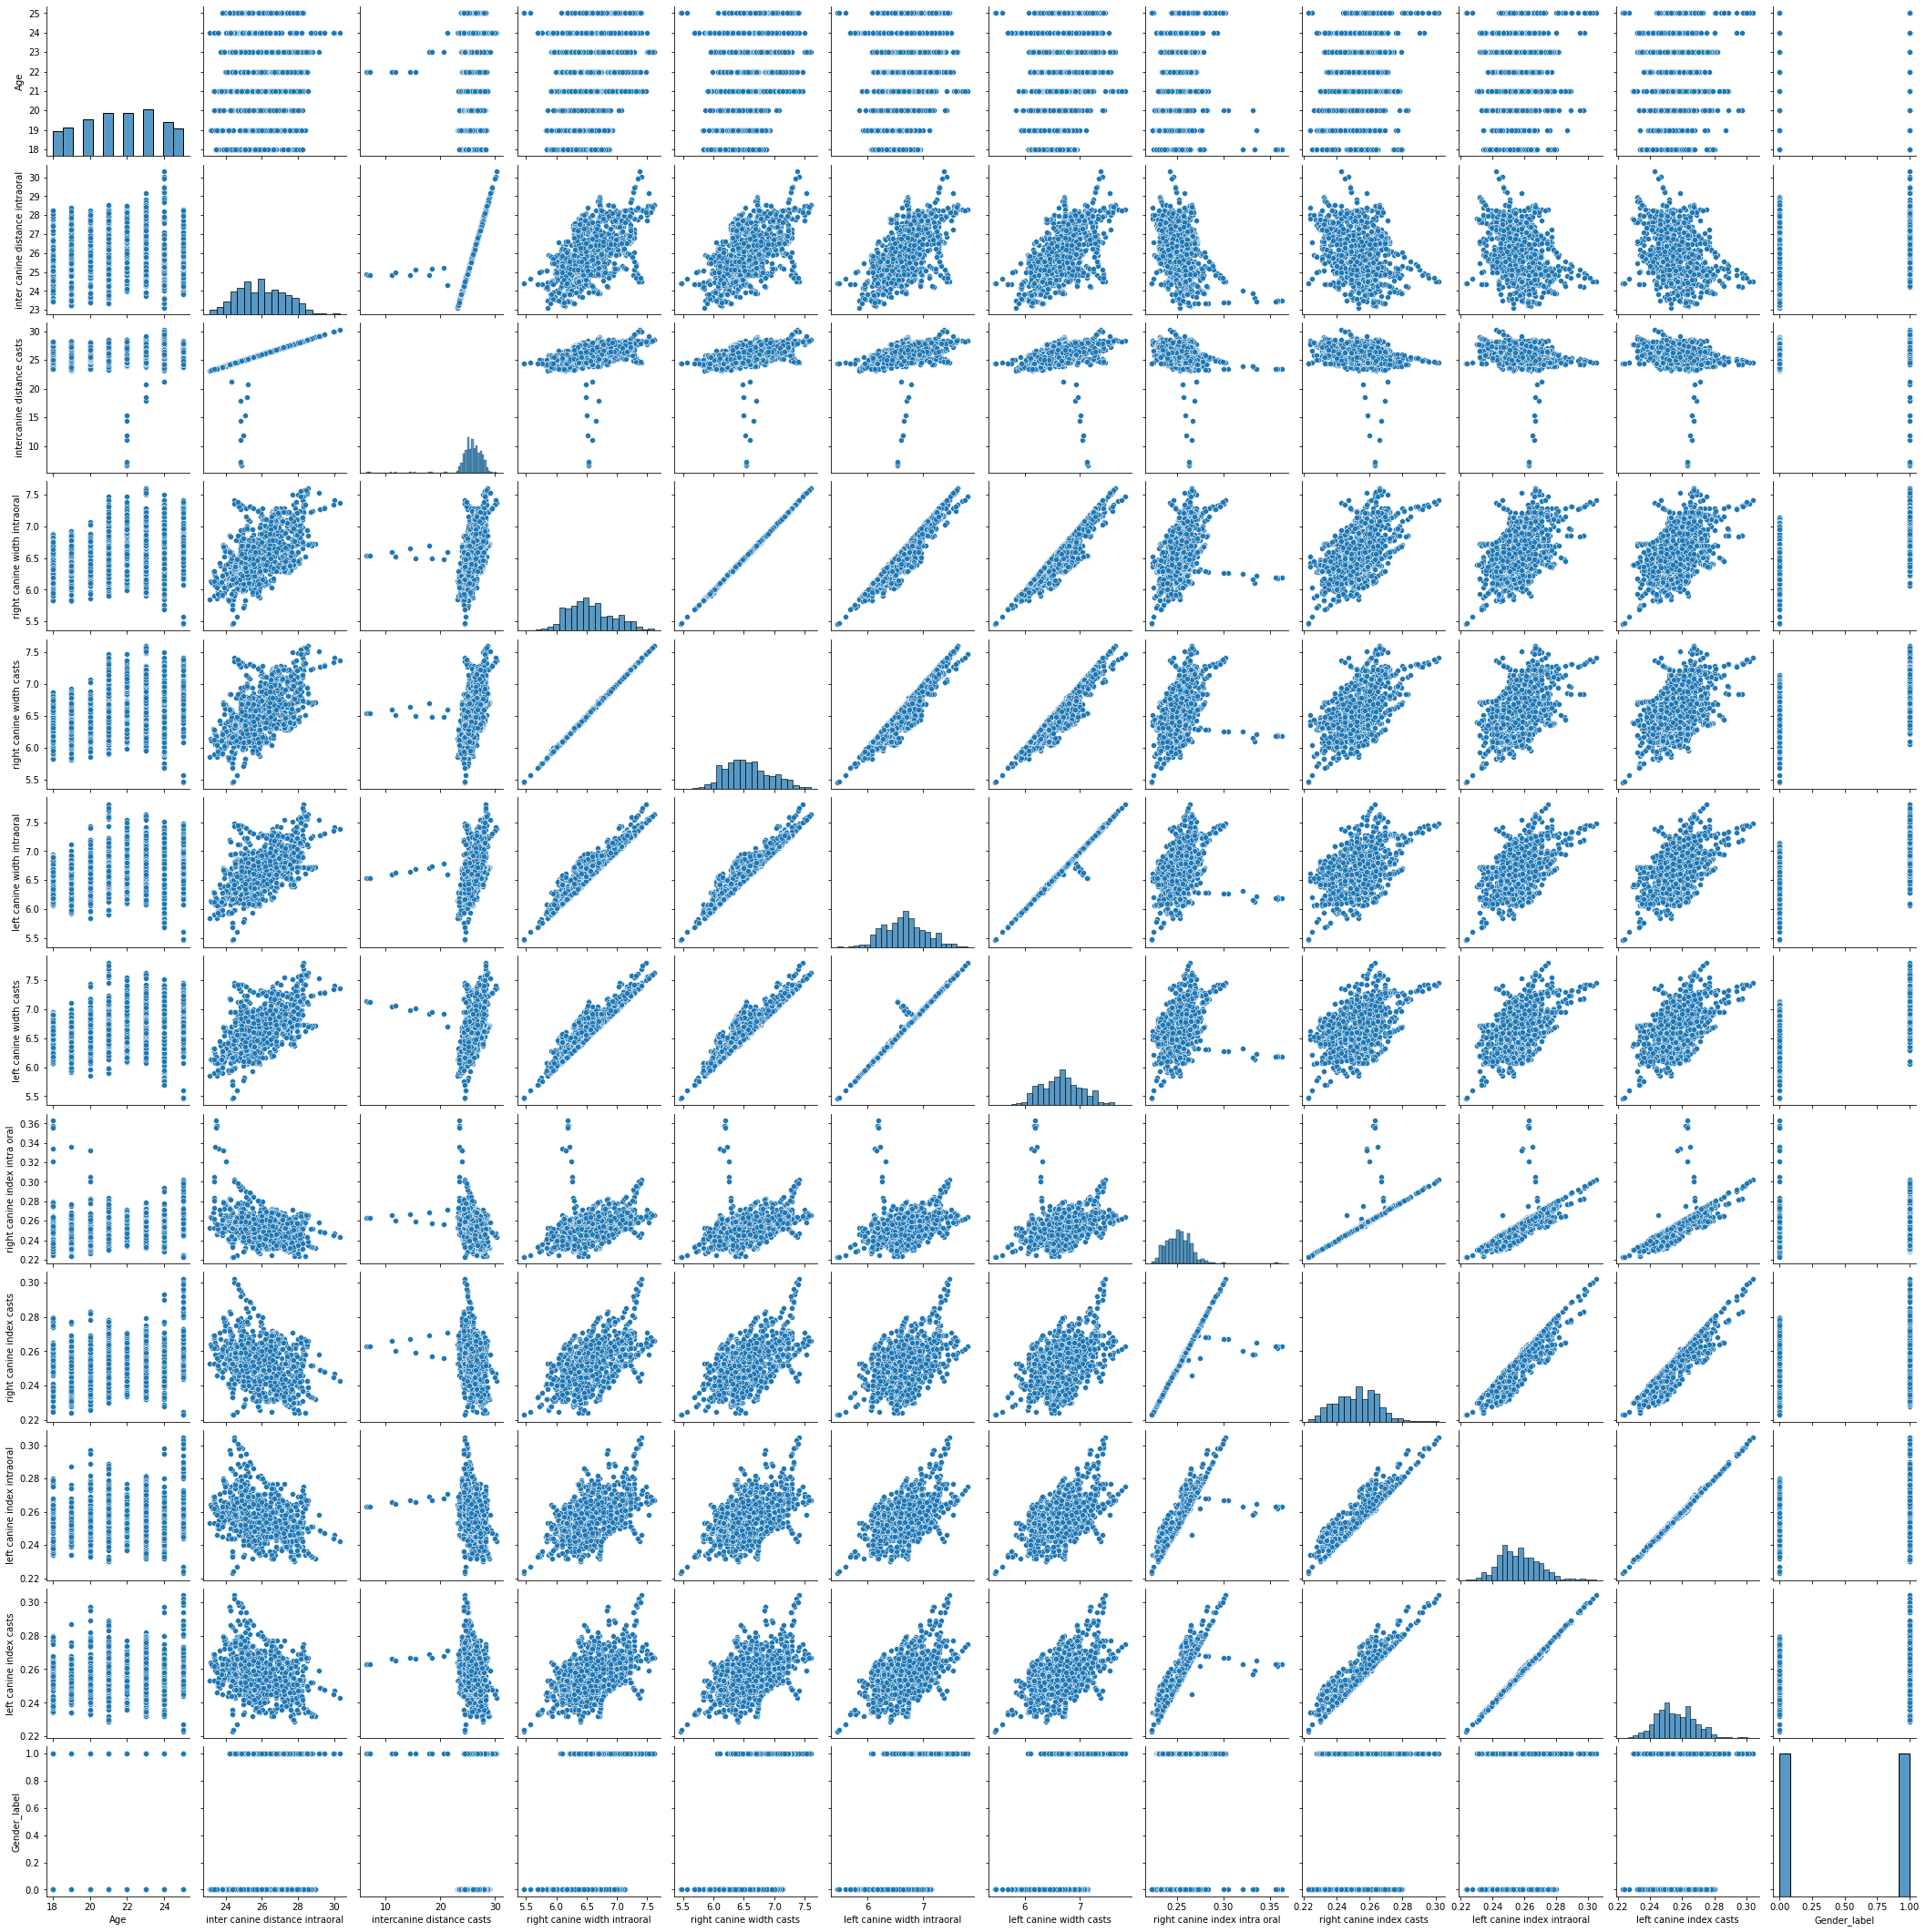

In [20]:
sns.pairplot(df)
plt.show()
#Visualize correlation of data points

<AxesSubplot:>

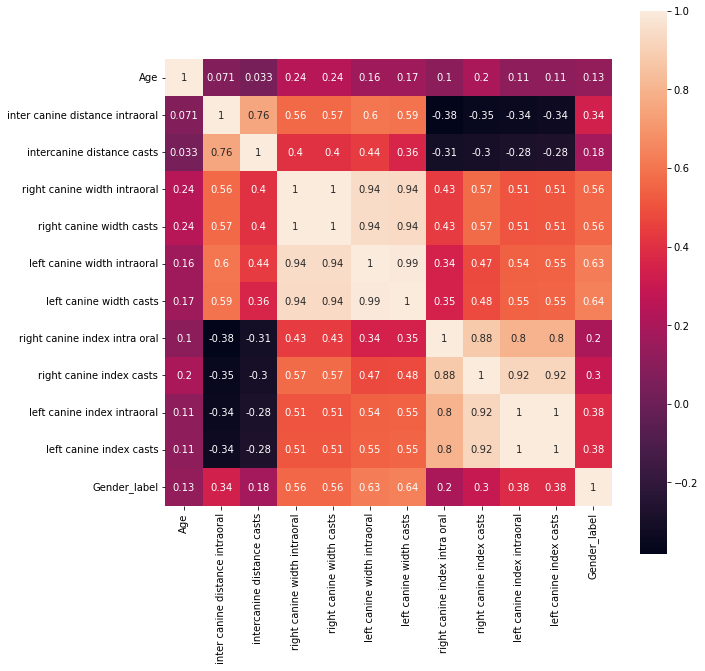

In [21]:
#reference to Correlation Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, square = True, annot = True, ax=ax)
# plotting correlation heatmap using seaborn

In [ ]:
#intercanine distance casts: inter canine distance intraoral,0.76
#left canine width intraoral:right canine width intraoral,0.94
#left canine width casts:right canine width casts.0.94
#left canine width casts:left canine width intraoral,0.99
#right canine index casts:right canine index intra oral,0.88
#left canine index intraoral:right canine index intra oral,0.80
#left canine index intraoral:right canine index casts,0.92
# identify highly correlated features >0.7 and remove


In [ ]:
# define independent Variables)X_df[['intercanine distance casts','inter canine distance intraoral','right canine width intraoral','right canine width casts','left canine width intraoral','left canine width casts','right canine index intra oral','left canine index casts','left canine index intraoral','right canine index casts']]


In [23]:
y = df['Gender_label']
# define y (dependent/ Target)

In [25]:
type(y)

pandas.core.series.Series

In [26]:
type(X)

pandas.core.frame.DataFrame

In [22]:
X = df.iloc[:,2:12]
#Seperating of Independent variables "X"

In [ ]:
#X = df.drop(['Gender', 'Gender_label', 'Age'], axis = 1)

In [27]:
#X = df.drop(['Gender', 'Gender_label', 'Age'], axis = 1)
X

inter canine distance intraoral  intercanine distance casts  \
Sl No                                                                
1                                25.06                       25.05   
2                                25.78                       25.79   
3                                23.83                       23.83   
4                                26.12                       26.12   
5                                26.36                       26.41   
...                                ...                         ...   
1096                             24.29                       24.29   
1097                             25.22                       25.22   
1098                             24.24                       24.24   
1099                             24.87                       24.87   
1100                             24.51                       24.51   

       right canine width intraoral  right canine width casts  \
Sl No                                                           
1                              6.08                      6.08   
2                              6.13                      6.13   
3                              5.91                      5.96   
4                              6.08                      6.08   
5                              6.09                      6.09   
...                             ...                       ...   
1096                           6.58                      6.58   
1097                           6.70                      6.70   
1098                           6.60                      6.60   
1099                           6.57                      6.57   
1100                           6.36                      6.36   

       left canine width intraoral  left canine width casts  \
Sl No                                                         
1                             6.09                     6.10   
2                             6.33                     6.33   
3                             6.28                     6.28   
4                             6.56                     6.56   
5                             6.50                     6.50   
...                            ...                      ...   
1096                          6.60                     6.60   
1097                          6.80                     6.80   
1098                          6.61                     6.61   
1099                          6.66                     6.66   
1100                          6.78                     6.78   

       right canine index intra oral  right canine index casts  \
Sl No                                                            
1                              0.242                     0.242   
2                              0.237                     0.237   
3                              0.248                     0.248   
4                              0.232                     0.232   
5                              0.231                     0.231   
...                              ...                       ...   
1096                           0.271                     0.271   
1097                           0.265                     0.265   
1098                           0.272                     0.272   
1099                           0.264                     0.264   
1100                           0.259                     0.259   

       left canine index intraoral  left canine index casts  
Sl No                                                        
1                            0.242                    0.241  
2                            0.247                    0.247  
3                            0.264                    0.264  
4                            0.250                    0.250  
5                            0.246                    0.246  
...                            ...                      ...  
1096                         0.272                    0.272  
1097         

In [28]:
y.shape

(1100,)

In [ ]:

#Dependent variables "y"

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 1010)

In [30]:
X_train

inter canine distance intraoral  intercanine distance casts  \
Sl No                                                                
674                              24.93                       24.96   
447                              23.50                       23.50   
499                              28.56                       28.56   
658                              25.63                       25.63   
504                              25.21                       25.20   
...                                ...                         ...   
535                              26.77                       26.77   
708                              25.94                       25.94   
502                              25.06                       25.06   
1043                             27.97                       27.97   
203                              24.23                       24.22   

       right canine width intraoral  right canine width casts  \
Sl No                                                           
674                            7.33                      7.33   
447                            6.18                      6.18   
499                            6.71                      6.71   
658                            6.62                      6.63   
504                            6.18                      6.18   
...                             ...                       ...   
535                            6.37                      6.37   
708                            7.21                      7.21   
502                            6.26                      6.26   
1043                           7.21                      7.21   
203                            6.18                      6.18   

       left canine width intraoral  left canine width casts  \
Sl No                                                         
674                           7.43                     7.42   
447                           6.18                     6.18   
499                           6.71                     6.71   
658                           6.69                     6.70   
504                           6.19                     6.20   
...                            ...                      ...   
535                           6.45                     6.45   
708                           7.26                     7.27   
502                           6.30                     6.30   
1043                          7.23                     7.23   
203                           6.21                     6.19   

       right canine index intra oral  right canine index casts  \
Sl No                                                            
674                            0.294                     0.293   
447                            0.358                     0.262   
499                            0.235                     0.235   
658                            0.258                     0.257   
504                            0.245                     0.245   
...                              ...                       ...   
535                            0.237                     0.237   
708                            0.278                     0.277   
502                            0.248                     0.248   
1043                           0.257                     0.257   
203                            0.255                     0.254   

       left canine index intraoral  left canine index casts  
Sl No                                                        
674                          0.298                    0.297  
447                          0.262                    0.262  
499                          0.235                    0.235  
658                          0.260                    0.260  
504                          0.245                    0.244  
...                            ...                      ...  
535                          0.244                    0.244  
708          

In [31]:
X_train.shape

(880, 10)

In [32]:
X_test


inter canine distance intraoral  intercanine distance casts  \
Sl No                                                                
830                              25.89                       25.89   
178                              24.23                       24.23   
400                              25.74                       25.74   
1053                             27.99                       27.99   
81                               26.29                       26.29   
...                                ...                         ...   
672                              25.39                       25.40   
85                               26.80                       26.80   
261                              28.23                       28.24   
133                              27.64                       27.66   
955                              26.35                       26.35   

       right canine width intraoral  right canine width casts  \
Sl No                                                           
830                            6.29                      6.29   
178                            6.17                      6.17   
400                            6.29                      6.29   
1053                           6.59                      6.60   
81                             6.93                      6.93   
...                             ...                       ...   
672                            7.31                      7.31   
85                             7.28                      7.28   
261                            7.12                      7.12   
133                            6.39                      6.39   
955                            6.67                      6.67   

       left canine width intraoral  left canine width casts  \
Sl No                                                         
830                           6.44                     6.44   
178                           6.20                     6.17   
400                           6.29                     6.29   
1053                          6.91                     6.92   
81                            6.93                     6.94   
...                            ...                      ...   
672                           7.32                     7.32   
85                            7.28                     7.28   
261                           7.13                     7.12   
133                           6.78                     6.78   
955                           6.76                     6.76   

       right canine index intra oral  right canine index casts  \
Sl No                                                            
830                            0.243                     0.243   
178                            0.254                     0.253   
400                            0.245                     0.245   
1053                           0.235                     0.235   
81                             0.263                     0.263   
...                              ...                       ...   
672                            0.288                     0.288   
85                             0.271                     0.271   
261                            0.252                     0.252   
133                            0.230                     0.230   
955                            0.253                     0.253   

       left canine index intraoral  left canine index casts  
Sl No                                                        
830                          0.250                    0.249  
178                          0.255                    0.254  
400                          0.245                    0.245  
1053                         0.247                    0.247  
81                           0.263                    0.263  
...                            ...                      ...  
672                          0.289                    0.288  
85           

In [33]:
y_train

Sl No
674     1
447     0
499     0
658     1
504     0
       ..
535     0
708     1
502     0
1043    1
203     0
Name: Gender_label, Length: 880, dtype: int32

In [34]:
y_test

Sl No
830     1
178     0
400     0
1053    1
81      1
       ..
672     1
85      1
261     0
133     0
955     1
Name: Gender_label, Length: 220, dtype: int32

In [35]:
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)

In [36]:
ss_train = StandardScaler()
X_train_norm = ss_train.fit_transform(X_train)
ss_test = StandardScaler()
X_test_norm = ss_test.fit_transform(X_test)

In [ ]:
y_train.shape

In [37]:
X_train_norm

array([[-0.79270395, -0.51989463,  2.06241152, ...,  3.23668907,
         3.40508264,  3.32260076],
       [-1.88279099, -1.34544446, -0.9824933 , ...,  0.78461104,
         0.48082289,  0.4871773 ],
       [ 1.97444007,  1.51570768,  0.42081066, ..., -1.35106983,
        -1.71237193, -1.70014936],
       ...,
       [-0.69360513, -0.46335012, -0.77067384, ..., -0.32277904,
        -0.41270093, -0.40395578],
       [ 1.52468388,  1.18209508,  1.74468232, ...,  0.38911458,
         0.15590514,  0.16312891],
       [-1.32631299, -0.93832399, -0.9824933 , ...,  0.15181671,
        -0.08778318, -0.07990739]])

In [39]:
# Testing with Regression 

model_test = LogisticRegression(random_state=1010)
model_test.fit(X_train_norm, y_train)
predictions = model_test.predict(X_test_norm)

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  88
False Positive(FP) =  14
True Negative(TN)  =  88
False Negative(FN) =  30


In [41]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.800


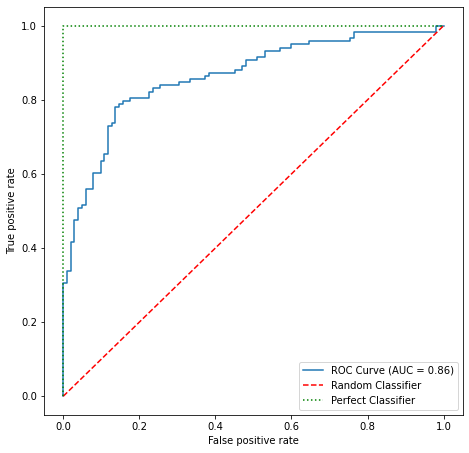

In [42]:
from sklearn.metrics import roc_curve, auc

#define metrics
y_pred_proba = model_test.predict_proba(X_test_norm)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#create ROC curve
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [43]:
seed = 1010
models = {}
#compare multiple Models

In [44]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(random_state=seed)

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(random_state=seed)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(random_state=seed)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(random_state=seed)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# XGBoost
import xgboost as xgb
models['XGBoost'] = xgb.XGBClassifier(random_state=seed)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}


In [46]:
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_norm, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test_norm)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)



In [47]:

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Logistic Regression      0.800000   0.745763  0.862745
Support Vector Machines  0.795455   0.737288  0.861386
Decision Trees           0.750000   0.762712  0.769231
Random Forest            0.790909   0.762712  0.833333
Naive Bayes              0.768182   0.703390  0.838384
K-Nearest Neighbor       0.818182   0.788136  0.861111
XGBoost                  0.813636   0.796610  0.846847

In [48]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=seed)

In [55]:

from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [56]:
models['XGBoost'].fit(X_train_norm, y_train)
test_pred = models['XGBoost'].predict(X_test_norm)

print(f1_score(y_test, test_pred), '\n'), confusion_matrix(y_test, test_pred)

0.8209606986899564 



(None,
 array([[85, 17],
        [24, 94]], dtype=int64))

In [57]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       102
           1       0.85      0.80      0.82       118

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.82      0.81      0.81       220



In [58]:

#hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
param = { 'max_depth': max_depth,
           'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 10000, num = 10)]}

print(param)


{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'n_estimators': [200, 1288, 2377, 3466, 4555, 5644, 6733, 7822, 8911, 10000]}


In [ ]:

import xgboost as xgb
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = xgb.XGBClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = param, n_iter = 100, cv = 3, verbose=2, random_state=seed, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train_norm, y_train)

In [ ]:
xgb_random.best_params_

In [ ]:
import xgboost as xgb

def evaluate(model, X_test_norm, y_test):
    predictions = model.predict(X_test_norm)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = accuracy_score(predictions, y_test)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = xgb.XGBClassifier(n_estimators = 10, random_state = seed)
base_model.fit(X_train_norm, y_train)
base_accuracy = evaluate(base_model, X_test_norm, y_test)

In [ ]:
best_random = xgb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_norm, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
from sklearn.metrics import roc_curve, auc

#define metrics
y_pred_proba = best_random.predict_proba(X_test_norm)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#create ROC curve
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()